# Personal preprocessing
* product_category
* product_subcategory 
* product_modelname 

In [300]:
def set_up(mode= None):
    pd.set_option('display.max_rows', mode)
# pd.options.display.max_rows = 60
set_up()

In [301]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df_train = pd.read_csv("../train.csv") # 학습용 데이터
df_test = pd.read_csv("../submission.csv") # 테스트 데이터(제출파일의 데이터)

# 데이터 계수 파악
len(df_train), len(df_test)

(59299, 5271)

## 신규 Columns 추가
---
* 밴 다이어그램을 통한 분류화
* 사람의 관심도를 표현하기 위해서 `customer_interest`로 명명.


In [302]:
def label_rows(row):
    if row['product_modelname'] is np.nan and row['product_subcategory'] is np.nan and row['product_category'] is np.nan:
        return 8
    elif row['product_modelname'] is np.nan and row['product_subcategory'] is np.nan:
        return 7
    elif row['product_modelname'] is np.nan and row['product_category'] is np.nan:
        return 6
    elif row['product_subcategory'] is np.nan and row['product_category'] is np.nan:
        return 5
    elif row['product_modelname'] is np.nan:
        return 4
    elif row['product_subcategory'] is np.nan:
        return 3
    elif row['product_category'] is np.nan:
        return 2
    else:
        return 1

df_train['customer_interest'] = df_train.apply(lambda row: label_rows(row), axis=1)
df_train[['product_modelname', 'product_subcategory', 'product_category']] = df_train[['product_modelname', 'product_subcategory', 'product_category']].fillna('Unknown') # 그 후 널값 채우기

## 결과

In [303]:
df_train.groupby('customer_interest')['is_converted'].mean()

customer_interest
1    0.147267
2    0.087719
3    0.102041
4    0.145729
5    0.005242
6    0.117021
7    0.076323
8    0.064555
Name: is_converted, dtype: float64

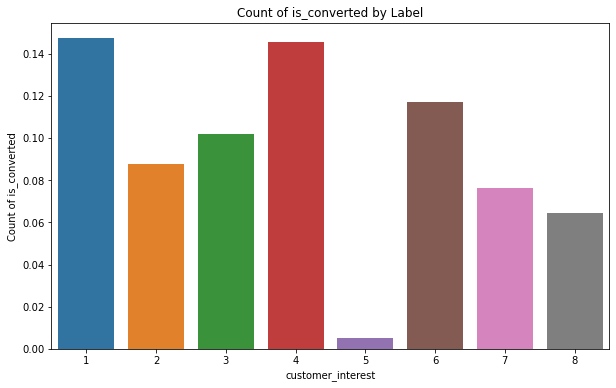

In [304]:
label_converted_count = df_train.groupby('customer_interest')['is_converted'].mean().reset_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_interest', y='is_converted', data=label_converted_count)
plt.xlabel('customer_interest')
plt.ylabel('Count of is_converted')
plt.title('Count of is_converted by Label')
plt.show()

## product_category 정리
* LG BTB 마케팅의 입력 양식을 참고
* 종류

In [305]:
df_train['product_category'] = df_train['product_category'].str.lower().str.strip()

In [306]:
# washing machine 추가
mask = df_train['product_category'] == 'commercial tv,projector'
copy_df = df_train[mask].copy()
copy_df['product_category'] = 'projector'
# 원본 데이터 프레임에 데이터 추가 
df_train = pd.concat([df_train, copy_df])

# dryer 추가
mask = df_train['product_category'] == 'commercial tv,projector'
copy_df = df_train[mask].copy()
copy_df['product_category'] = 'commercial tv'
df_train = pd.concat([df_train, copy_df])

# 원본데이터 삭제.
df_train = df_train[df_train['product_category'] != 'commercial tv,projector']

In [307]:
# washing machine 추가
mask = df_train['product_category'] == 'washing machine,dryer'
copy_df = df_train[mask].copy()
copy_df['product_category'] = 'washing machine'
# 원본 데이터 프레임에 데이터 추가 
df_train = pd.concat([df_train, copy_df])

# dryer 추가
mask = df_train['product_category'] == 'washing machine,dryer'
copy_df = df_train[mask].copy()
copy_df['product_category'] = 'dryer'
df_train = pd.concat([df_train, copy_df])

# 원본데이터 삭제.
df_train = df_train[df_train['product_category'] != 'washing machine,dryer']

In [308]:
def set_up(mode= None):
    pd.set_option('display.max_rows', mode)
# pd.options.display.max_rows = 60
set_up()

In [309]:
replacement_dict = {
    'interactive signage': 'interactive digital board',
    'education createboard': 'interactive digital board',
    '互動式顯示屏': 'interactive digital board',
    'multi inverter': 'multi-split',
    'multi split' : 'multi-split',
    'video wall': 'video wall signage',
    'videowall_rmk': 'video wall signage',
    '43us660h0sd.awz': 'hotel tv',
    'high brightness': 'high brightness signage',
    'residential air conditioner': 'rac',
    'aire acondicionado residencial': 'rac',
    'ar condicionado residencial' : 'rac',
    'all lg vrf systems': 'vrf',
    'ur640': 'ur640s',
    'idb': 'interactive digital board',
    'id': 'interactive digital board',
    'others': 'etc.',
    'other': 'etc.',
    'lainnya': 'etc.',
    'otros': 'etc.',
    'sales inquiry': 'etc.',
    'commercial tv,tv': 'commercial tv',
    'monitor signage,commercial tv': 'commercial tv',
    'onequick series': 'one:quick',
    'lg one:quick': 'one:quick',
    'led 顯示屏': 'led signage',
    '32lq621cbsb.awz': 'smart tv signage',
    'monitor signage,commercial tv,monior/monitor tv': 'monitor signage,monior/monitor tv',
    'monior/monitor tv,tv': 'monitor signage,monior/monitor tv',
    'monitor signage,tv': 'monitor signage,monior/monitor tv',
    'monior/monitor tv,pc': 'monitor signage,monior/monitor tv',
    'monitor signage,pc': 'monitor signage,monior/monitor tv',
    'isıtma': 'heating',
    'calefacción': 'heating',
    'ogrzewanie (pompy ciepła)' : 'heating',
    'standalone': 'commercial tv',
    'system ac': 'single-split',
    'vrf,single-split': 'vrf',
    'system ac,chiller': 'single-split',
    'điều hòa trung tâm multi': 'single-split',
    'sac' : 'single-split',
    'fhd series': 'standard signage',
    'tv signage': 'standard signage',
    'oled 顯示屏': 'oled signage',
    'מזגנים למקום מגורים': 'rac',
    'htv': 'commercial tv',
    'multi v5 vrf': 'multi v 5 air',
    'led': 'led signage',
    'chiller,aircare': 'chiller',
    'vrf,multi-split,single-split,chiller': 'chiller',
    'vrf,chiller': 'chiller',
    'vrf,multi-split,single-split': 'multi-split',
    'vrf,multi-split': 'multi-split',
    'single split': 'single-split',
    'soğutucu': 'single-split',
    '標準顯示屏': 'led signage',
    'monitor signage,monior/monitor tv' : 'monitor',
    'teto ou cassete inverter' : 'single-split',
    'one quick:flex' : 'one:quick',
    'تكييف وتبريد' : 'single-split',
    'comercial tv' : 'commercial tv',
    'تكييفات' : 'single-split',
    'مبرد (تشيلر)' : 'single-split',
    'חימום' : 'heating',
    'ฯลฯ' : 'etc.',
    'vb.' : 'etc.',
    'videwall' : 'video wall signage',
    'videowall signage' : 'video wall signage',
    'hospitality' : 'hotel tv',
    'signage' : 'etc.',
    
}

df_train['product_category'] = df_train['product_category'].replace(replacement_dict)
df_train['product_category'] = df_train['product_category'].str.replace('solar,', '')

In [ ]:
# 필터 안에 순서가 매우 중요.
filter1 = {
    'interactive' : 'interactive digital board',
    'vrf' : 'vrf',
    'multi-split' : 'multi-split',
    'video wall' : 'video wall signage',
    'single' : 'single-split',
    'air conditioner' : 'single-split',
    'chiller' : 'chiller',
    'hotel tv' : 'hotel tv',
    'hospital tv' : 'hospital tv',
    'smart tv signage' : 'smart tv signage',
    'smart' : 'smart tv signage',
    'standard' : 'standard signage',
    'one:quick' : 'one:quick',
    'medical' : 'medical display',
    'system ac' : 'single-split',
    'commercial tv' : 'commercial tv',
    'multi v' : 'multi v',
    'monitor' : 'monitor',
    'projector' : 'projector',
    'cloud' : 'cloud device',
    'ess' : 'ess',
    'energy' : 'ess',
    'robot' : 'robot',
    'pc' : 'pc',
    'tv' : 'tv',
    'air' : 'single-split'
}

df_train['mapped_key'] = df_train['product_category'].apply(lambda x: next((v for k, v in filter1.items() if k in x), x))
df_train['mapped_key'].value_counts()

* interactive signage = interactive digitalborad
* rac가 안보이니깐 일단 패스
* accessories : 일일히 분해 필요.
* technical support	: 기술적 지원...? 그리고 services 비슷한 국가에서 행동,

## 같은 Category의 경우 대체

In [311]:
category_counts = df_train['product_category'].value_counts()
categories_to_replace = category_counts[category_counts < 6].index
df_train.loc[df_train['product_category'].isin(categories_to_replace), 'product_category'] = 'etc.'
df_train['product_category'].value_counts()

unknown                              19374
interactive digital board             8079
vrf                                   5725
multi-split                           3944
etc.                                  2411
video wall signage                    2146
led signage                           1922
single-split                          1916
rac                                   1755
oled signage                          1356
hotel tv                              1135
chiller                               1073
standard signage                      1012
medical display                        962
monitor                                796
lg one:quick series                    768
heating                                709
high brightness signage                696
one:quick series                       668
ventilation                            420
control                                263
software solution                      191
accessories                            179
special sig

In [312]:
cate_num_dict = {
    0 : 'commercial_display',
    1 : 'hvac',
    2 : 'it_products',
    3 : 'commercial_laundry',
    4 : 'robot',
    -1 : 'non_serviced',
}


cate_dict  = {
    'interactive digital board' : 0,
    'vrf' : 1,
    'multi-split' : 1,
    'video wall signage': 0,
    'led signage' : 0,
    'single-split' : 1,
    'oled signage' : 0,
    'hotel tv' : 0,
    'chiller' : 1,
    'standard signage' : 0,
    'medical display' : 2,
    'one:quick' : 0,
    'heating' : 1,
    'high brightness signage' : 0,
    'ventilation' : 0,
    'control' : -1,
    'aircare' : -1,
    'rac' : 1,
    'software solution' : 0,
    'special signage' : 0,
    'hospital tv' : 0,
    'webos' : 0,
    'pc' : 2,
    'pro:centric' : 0,
    'projector' : 2,
    'commercial display' : 0,
    'ur640s' : 0,
    'outros' : 1,
    'signage care solution' : 0,
    'multi v' : 1,
    'smart tv signage' : 0,
    'cloud device' : 2,
    'medical displays' : 2,
    'laptop' : 2,
    'a thermodynamic water heater' : 1,
    'monitor' : 2,
    'uhd signage' : 0,
    'virtual production' :  0,
    'ogrzewanie (pompy ciepła)' : 1,
    'commercial tv' : 0,
    'digital signage' : 0,
    'ess': 1,
    'ledallinone' : 0,
    '28mq780' : 2,
    'tv' : 0,
    'washing machine' : 3,
    'dryer' : 3,
    'aircare' : -1,
    'robots' : 4,
    'error' : -1,
    '' : -1,
    'signage' : 0,
    'transparent oled' : 0,
    
}

subcate_dict = {
    'interactive digital board' : 'digital_signage',
    'vrf' : 'commercial_solutions',
    'multi-split' : 'multi_split',
    'video wall signage' : 'digital_signage',
    'led signage' : 'led_signage',
    'single-split' : 'commercial_solutions',
    'oled signage' : 'oled_signage',
    'hotel tv' : 'commercial_tv',
    'chiller' : 'commercial_solutions',
    'standard signage' : 'digital_signage',
    'medical display' : 'medical_display',
    'one:quick' : 'digital_signage',
    'heating': 'residential_solutions',
    'high brightness signage' : 'digital_signage',
    'ventilation' : 'commercial_solutions',
    'control' : 'non_serviced',
    'rac' : 'residential_solutions',
    'software solution' : 'software',
    'special signage' : 'digital_signage',
    'hospital tv' : 'commercial_tv',
    'webos' : 'software',
    'pro:centric': 'commercial_tv',
    'projector' : 'projector',
    'ur640s' : 'digital_signage',
    'outros' : 'residential_solutions',
    'signage care solution' : 'software',
    'smart tv signage' : 'commercial_tv',
    'cloud device' : 'cloud_device',
    'medical displays' : 'medical displays',
    'laptop' : 'laptop',
    'a thermodynamic water heater' : 'residential_solutions',
    'monitor' : 'monitor',
    'uhd signage' : 'digital_signage',
    'virtual production' : 'led_signage',
    'commercial tv' : 'commercial_tv',
    'digital signage' : 'digital_signage',
    'ess' : 'ess',
    'ledallinone' : 'led_signage',
    '28mq780' : 'monitor',
    'multi v' : 'commercial_solutions',
    'washing machine' : 'washer',
    'dryer' : 'dryer',
    'transparent oled' : 'oled_Signage'
}

subsubcate_dict = {
    'interactive digital board' : 'interactive',
    'video wall signage' : 'video_wall',
    'single split' : 'single_split',
    'chiller' : 'chiller',
    'standard signage' : 'standard',
    'one:quick' : 'one:quick',
    'ventilation' : 'ventilation_solution(erv)',
    'control' : 'non_serviced',
    'software solution' : 'supersign_software',
    'special signage' : 'special',
    'hotel tv' : 'hospitality_tv',
    'hospital tv' : 'hospitality_tv',
    'webos' : 'webos',
    'pro:centric' : 'hospitality_tv',
    'ur640s' : 'standard',
    'signage care solution' : 'signage_care_solution',
    'smart tv signage' : 'hospitality_tv',
    'uhd signage' : 'uhd_sinange',
    'virtual production' : 'virtual_production',
    'multi v' : 'vrf_system',
    'vrf' : 'vrf_system',
    'outros' : 'air_to_water_heat_pumps',
    'laptop' : 'gram',
    'ogrzewanie (pompy ciepła)' : 'air_to_water_heat_pumps',
    'ledallinone' : 'all_in_one',
    '28mq780' : 'ultrawide',
    'heating': 'air_to_water_heat_pumps',
    'a thermodynamic water heater' : 'water_heater',
    'transparent oled' : 'transparent_oled'
}

df_train['category_1'] = df_train['product_category'].map(cate_dict)
df_train['category_1'] = df_train['category_1'].map(cate_num_dict)
df_train['category_2'] = df_train['product_category'].map(subcate_dict)
df_train['category_3'] = df_train['product_category'].map(subsubcate_dict)
df_train = df_train.drop('product_category', axis=1)

## 중간 확인
* 실행 안시켜도 됨.


In [270]:
cond1 = (df_train['product_category'] == 'not specified')# & (df_train['product_subcategory'] != 'Unknown')
df_train[cond1][['customer_country','product_category', 'product_subcategory', 'product_modelname', 'is_converted']]

,customer_country,product_category,product_subcategory,product_modelname,is_converted
